# Kịch bản 2 (039 Mininet-wifi)
Nondynamic
- Path 1: bw = 30-35Mbps, delay = 10ms, no loss, no jitter
- Path 2: bw = 55-60Mbps, delay = 15ms, no loss, no jitter

### Đọc file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read CSV files based on user input
def read_csv_files(data_frames, base_path, webArr, schArr, stmArr, brsArr, mdlArr):
    for i in range(0, len(webArr)):
        for j in range(0, len(schArr)):
            for k in range(0, len(stmArr)):
                for l in range(0, len(brsArr)):
                    for m in range(0, len(mdlArr)):
                        file_path = f'{base_path}/{webArr[i]}-time-{schArr[j]}-{stmArr[k]}-{brsArr[l]}-{mdlArr[m]}.csv'
                        df = pd.read_csv(file_path)
                        data_frames.append(df)
#    return data_frames

# Function to calculate average data
def calculate_average(data_frames):
    averages = []
    for df in data_frames:
        data = df.values.tolist()
        aver_data = np.mean(data, axis=0)
        averages.append(aver_data)
    return averages

# Function to plot the data
# def plot_data(averages, webArr, schArr, stmArr, brsArr, mdlArr):
#     n = 0
#     for i in range(0, len(webArr)):
#         for j in range(0, len(schArr)):
#                 for l in range(0, len(brsArr)):
#                     for m in range(0, len(mdlArr)):
#                         plt.figure(figsize=(6, 4)) 
#                         start = 0
#                         step = 1 / len(averages[n*i])

#                         for k in range(0, len(stmArr)):
#                             print(len(averages[n*i + k]))
#                             x = np.array(averages[n*i + k])
#                             x = np.insert(x, 0, 0)
#                             y = np.arange(0, len(averages[n*i + k])) * step + start
#                             y = np.insert(y, len(averages[n*i + k]), 1)
#                             plt.plot(x, y, label=f'{stmArr[k]}')
#                         n = len(stmArr)
#                         print(n)

#                        # plt.xlim(0, 1)
#                         plt.xlabel('Time(s)')
#                         plt.ylabel('CDF')
#                         plt.title(f'ObjectIndex ({webArr[i]}-{schArr[j]}-{brsArr[l]}-{mdlArr[m]})')
#                         plt.legend()
#                         plt.grid(True)
#                         plt.show()
#                         plt.savefig(f'{webArr[i]}-{schArr[j]}-{brsArr[l]}-{mdlArr[m]}.png', bbox_inches='tight')

def plot_data(averages, webArr, schArr, mdlArr):
    brsArr = ["safari", "firefox", "chrome"]
    plt.figure(figsize=(6,4)) 
    n=0
    obNumber = 0
    avgTime = 0
    for brs in brsArr:
        if brs == "chrome":
            stmArr = ["FCFS"]  
        elif brs == "firefox":
            stmArr = ["WRR", "SWRR", "NII"] 
        else:
            stmArr = ["RR", "WRR", "NII"] 

        for stm in stmArr:
            legend_label = f"{brs}-{stm}"
            start = 0
            step = 1 / len(averages[n])

           # for k in range(0, len(stmArr)):
            print(len(averages[n]))
            obNumber = len(averages[n])
            x = np.array(averages[n])
            x = np.insert(x, 0, 0)
            y = np.arange(0, len(averages[n])) * step + start
            y = np.insert(y, len(averages[n]), 1)
            if stm == "NII":
                #plt.plot(x, y, label=f'{brs}-Proposed')
                print("")
            else:
                plt.plot(x, y, label=f'{brs}-{stm}')
                avgTime += averages[n][-1]
                print(averages[n])
            n+=1
            # n = len(stmArr)
            # print(n)
    print(avgTime/5)

    # plt.xlim(0, 1)
    # plt.rcParams.update({'font.size': 22})
    plt.xlabel(f'Time (s)\n(Avg Webpage Completion Time: {round(avgTime/5,2)}s)')
    plt.ylabel(f'CDF (number of objects: {obNumber} )')
    plt.title(f'SpeedIndex ({webArr}-{schArr}-{mdlArr})')
    plt.legend()
    plt.grid(True)
    plt.show()
    # plt.savefig(f'{webArr[i]}-{schArr[j]}-{brsArr[l]}-{mdlArr[m]}.png', bbox_inches='tight')




Matplotlib created a temporary config/cache directory at /tmp/matplotlib-cavjuwqn because the default path (/home/trungnt/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


14
[0.03029433 0.0440351  0.05402676 0.06732806 0.07364949 0.08491927
 0.09417321 0.10054208 0.14143253 0.20962644 0.25031587 0.31064786
 0.48878501 0.6522003 ]
14
[0.03036866 0.0408054  0.05472774 0.08352061 0.09579521 0.11304401
 0.14816742 0.19570744 0.34536241 0.40029165 0.46379336 0.50491222
 0.62788954 0.71777369]
14

14
[0.03124376 0.04359327 0.04746978 0.06295106 0.08036183 0.10211884
 0.18024328 0.19395729 0.22732221 0.25988971 0.32522356 0.50502951
 0.61852479 0.73399831]
14
[0.03159382 0.06285917 0.07105389 0.08713788 0.09814734 0.10585597
 0.11232571 0.1278254  0.2186382  0.28107414 0.29856082 0.31170962
 0.62685888 0.69130103]
14

14
[0.03046    0.04618692 0.05666797 0.06821176 0.07680641 0.11659605
 0.1761949  0.21621962 0.35455081 0.56144254 0.61691618 0.62322189
 0.62555434 0.62826579]
0.6847078242526317


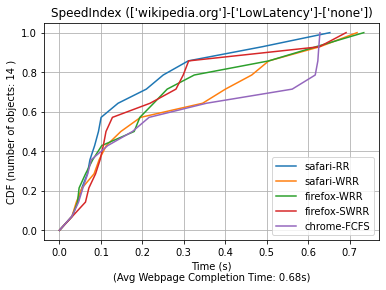

In [2]:
# User inputs
file_path = "../../www/listwebsite.txt"
# Initialize an array to store website list
webArr = []
# Read file and store to array
with open(file_path, 'r') as file:
    for line in file:
        line = line.strip().replace('https://', '')  # Remove 'https://' from the beginning of the line
        webArr.append(line)

base_path = "../SFCWchromium/lowlatency"
data_frames = []
# num_files = int(input("Enter the number of CSV files: "))

webArr = ["wikipedia.org"]
schArr = ["LowLatency"]
stmArr = ["RR","WRR","NII"]
brsArr = ["safari"]
mdlArr = ["none"]
read_csv_files(data_frames, base_path, webArr, schArr, stmArr, brsArr, mdlArr)

schArr = ["LowLatency"]
stmArr = ["WRR","SWRR","NII"]
brsArr = ["firefox"]
mdlArr = ["none"]
read_csv_files(data_frames, base_path, webArr, schArr, stmArr, brsArr, mdlArr)

schArr = ["LowLatency"]
stmArr = ["FCFS"]
brsArr = ["chrome"]
mdlArr = ["none"]
read_csv_files(data_frames, base_path, webArr, schArr, stmArr, brsArr, mdlArr)

#print(data_frames)
# Calculate average data
averages = calculate_average(data_frames)
#print(averages)
# Plot the data
plot_data(averages, webArr, schArr, mdlArr)

14
[0.03073265 0.03965103 0.05388632 0.06537269 0.073744   0.0812486
 0.08621933 0.09847319 0.14362708 0.18023673 0.20836628 0.26203683
 0.41400518 0.58027921]
14
[0.03582115 0.05101429 0.05914405 0.06578896 0.08777615 0.13644513
 0.17868062 0.245397   0.34037054 0.36654996 0.41261045 0.46358758
 0.56216807 0.64534734]
14

14
[0.03051289 0.04878804 0.06269084 0.07914142 0.09495145 0.11852228
 0.13382026 0.14546131 0.16831979 0.18577159 0.24829271 0.36375852
 0.459732   0.58765317]
14
[0.0343707  0.03902536 0.05082281 0.06054568 0.07425585 0.08025152
 0.098633   0.14449011 0.19641424 0.24967445 0.27216506 0.28183229
 0.5827806  0.64232449]
14

14
[0.03722402 0.05365531 0.06036677 0.07744497 0.092333   0.12086615
 0.1549774  0.1957313  0.35386248 0.58399578 0.62725009 0.63153569
 0.63368447 0.6355836 ]
0.6182375609157894


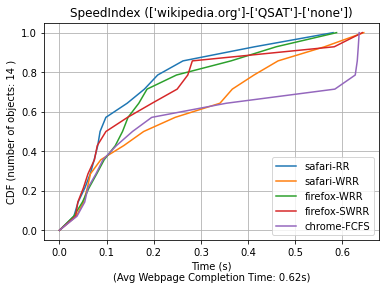

In [3]:
base_path = "../SFCWchromium/qsat"
data_frames = []
# num_files = int(input("Enter the number of CSV files: "))

webArr = ["wikipedia.org"]
schArr = ["QSAT"]
stmArr = ["RR","WRR","NII"]
brsArr = ["safari"]
mdlArr = ["none"]
read_csv_files(data_frames, base_path, webArr, schArr, stmArr, brsArr, mdlArr)

schArr = ["QSAT"]
stmArr = ["WRR","SWRR","NII"]
brsArr = ["firefox"]
mdlArr = ["none"]
read_csv_files(data_frames, base_path, webArr, schArr, stmArr, brsArr, mdlArr)

schArr = ["QSAT"]
stmArr = ["FCFS"]
brsArr = ["chrome"]
mdlArr = ["none"]
read_csv_files(data_frames, base_path, webArr, schArr, stmArr, brsArr, mdlArr)

#print(data_frames)
# Calculate average data
averages = calculate_average(data_frames)
#print(averages)
# Plot the data
plot_data(averages, webArr, schArr, mdlArr)

15
[0.09542708 0.11272343 0.14406848 0.16820051 0.21529083 0.23729394
 0.28277907 0.30862721 0.35999268 0.40888552 0.60156964 0.72417969
 0.8258383  0.86263643 0.87727509]
15
[0.09946502 0.12185585 0.16793726 0.19118411 0.23348091 0.2689745
 0.3170166  0.33954864 0.36292987 0.43569289 0.62020859 0.72266377
 0.82927219 0.86727523 0.87851786]
15

15
[0.13299109 0.15307251 0.18137064 0.20027013 0.23718875 0.24969461
 0.2768389  0.29746355 0.32973151 0.39420714 0.58372037 0.69641435
 0.78706445 0.81231705 0.82708562]
15
[0.09639432 0.13290943 0.18439124 0.2052471  0.25763594 0.28217717
 0.31867105 0.33115898 0.38472834 0.4634934  0.6034358  0.75410529
 0.85192736 0.89105221 0.90808449]
15



IndexError: list index out of range

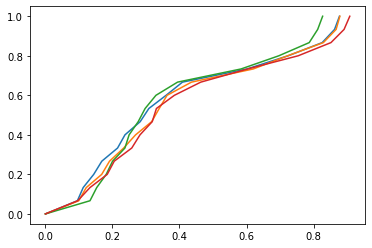

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read CSV files based on user input
def read_csv_files(data_frames, base_path, webArr, schArr, stmArr, brsArr, mdlArr):
    for i in range(0, len(webArr)):
        for j in range(0, len(schArr)):
            for k in range(0, len(stmArr)):
                for l in range(0, len(brsArr)):
                    for m in range(0, len(mdlArr)):
                        file_path = f'{base_path}/{webArr[i]}-time-{schArr[j]}-{stmArr[k]}-{brsArr[l]}-{mdlArr[m]}.csv'
                        df = pd.read_csv(file_path)
                        data_frames.append(df)
#    return data_frames

# Function to calculate average data
def calculate_average(data_frames):
    averages = []
    for df in data_frames:
        data = df.values.tolist()
        aver_data = np.mean(data, axis=0)
        averages.append(aver_data)
    return averages

# Function to plot the data
# def plot_data(averages, webArr, schArr, stmArr, brsArr, mdlArr):
#     n = 0
#     for i in range(0, len(webArr)):
#         for j in range(0, len(schArr)):
#                 for l in range(0, len(brsArr)):
#                     for m in range(0, len(mdlArr)):
#                         plt.figure(figsize=(6, 4)) 
#                         start = 0
#                         step = 1 / len(averages[n*i])

#                         for k in range(0, len(stmArr)):
#                             print(len(averages[n*i + k]))
#                             x = np.array(averages[n*i + k])
#                             x = np.insert(x, 0, 0)
#                             y = np.arange(0, len(averages[n*i + k])) * step + start
#                             y = np.insert(y, len(averages[n*i + k]), 1)
#                             plt.plot(x, y, label=f'{stmArr[k]}')
#                         n = len(stmArr)
#                         print(n)

#                        # plt.xlim(0, 1)
#                         plt.xlabel('Time(s)')
#                         plt.ylabel('CDF')
#                         plt.title(f'ObjectIndex ({webArr[i]}-{schArr[j]}-{brsArr[l]}-{mdlArr[m]})')
#                         plt.legend()
#                         plt.grid(True)
#                         plt.show()
#                         plt.savefig(f'{webArr[i]}-{schArr[j]}-{brsArr[l]}-{mdlArr[m]}.png', bbox_inches='tight')

def plot_data(averages, webArr, schArr, mdlArr):
    brsArr = ["safari", "firefox", "chrome"]
    plt.figure(figsize=(6,4)) 
    n=0
    obNumber = 0
    avgTime = 0
    for brs in brsArr:
        if brs == "chrome":
            stmArr = ["FCFS"]  
        elif brs == "firefox":
            stmArr = ["WRR", "SWRR", "NII"] 
        else:
            stmArr = ["RR", "WRR", "NII"] 

        for stm in stmArr:
            legend_label = f"{brs}-{stm}"
            start = 0
            step = 1 / len(averages[n])

           # for k in range(0, len(stmArr)):
            print(len(averages[n]))
            obNumber = len(averages[n])
            x = np.array(averages[n])
            x = np.insert(x, 0, 0)
            y = np.arange(0, len(averages[n])) * step + start
            y = np.insert(y, len(averages[n]), 1)
            if stm == "NII":
                #plt.plot(x, y, label=f'{brs}-Proposed')
                print("")
            else:
                plt.plot(x, y, label=f'{brs}-{stm}')
                avgTime += averages[n][-1]
                print(averages[n])
            n+=1
            # n = len(stmArr)
            # print(n)
    print(avgTime/5)

    # plt.xlim(0, 1)
    # plt.rcParams.update({'font.size': 22})
    plt.xlabel(f'Time (s)\n(Avg Webpage Completion Time: {round(avgTime/5,2)}s)')
    plt.ylabel(f'CDF (number of objects: {obNumber} )')
    plt.title(f'SpeedIndex ({webArr}-{schArr}-{mdlArr})')
    plt.legend()
    plt.grid(True)
    plt.show()
    # plt.savefig(f'{webArr[i]}-{schArr[j]}-{brsArr[l]}-{mdlArr[m]}.png', bbox_inches='tight')




base_path = "../result-wireless"
data_frames = []
# num_files = int(input("Enter the number of CSV files: "))

webArr = ["google.com"]
stmArr = ["WRR"]
schArr = ["LowLatency","ECF","BLEST","Peekaboo","QSAT","FQSAT"]
brsArr = ["firefox"]
mdlArr = ["none"]
read_csv_files(data_frames, base_path, webArr, schArr, stmArr, brsArr, mdlArr)

# schArr = ["QSAT"]
# stmArr = ["WRR","SWRR","NII"]
# brsArr = ["firefox"]
# mdlArr = ["none"]
# read_csv_files(data_frames, base_path, webArr, schArr, stmArr, brsArr, mdlArr)

# schArr = ["QSAT"]
# stmArr = ["FCFS"]
# brsArr = ["chrome"]
# mdlArr = ["none"]
# read_csv_files(data_frames, base_path, webArr, schArr, stmArr, brsArr, mdlArr)

#print(data_frames)
# Calculate average data
averages = calculate_average(data_frames)
#print(averages)
# Plot the data
plot_data(averages, webArr, schArr, mdlArr)